# Convolutional NN

In [1]:
import numpy as np
import gzip
import os
import pickle
from matplotlib import pyplot


from si.data import Dataset, summary
from si.util.util import to_categorical

Load the MNIST dataset

In [2]:
def load_mnist(sample_size=None):
    DIR = os.path.dirname(os.path.realpath('.'))
    filename = os.path.join(DIR, 'datasets/mnist.pkl.gz')
    f = gzip.open(filename, 'rb')
    data = pickle.load(f, encoding='bytes')
    (x_train, y_train), (x_test, y_test) = data
    if sample_size:
        return Dataset(x_train[:sample_size],y_train[:sample_size]),Dataset(x_test,y_test)
    else:
        return Dataset(x_train,y_train),Dataset(x_test,y_test)

In [3]:
train,test = load_mnist(500)

In [4]:
def preprocess(train):
    # reshape and normalize input data 
    train.X = train.X.reshape(train.X.shape[0], 28, 28, 1)
    train.X = train.X.astype('float32')
    train.X /= 255
    train.Y = to_categorical(train.Y)

In [5]:
preprocess(train)
preprocess(test)

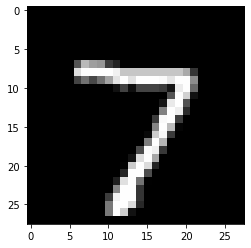

In [6]:
def plot_img(img,shape=(28,28)):
    pic = (img*255).reshape(shape)
    pic = pic.astype('int')
    pyplot.imshow(pic, cmap=pyplot.get_cmap('gray'))
    pyplot.show()

plot_img(test.X[0])

In [7]:
from si.supervised.nn import NN, Dense, Activation, Conv2D, Flatten
from si.util.activation import Tanh, Sigmoid

Build the model

In [8]:
net = NN(epochs=2000,lr=0.1,verbose=False)
net.add(Conv2D((28, 28,1), (3, 3), 1))  
net.add(Activation(Tanh()))
net.add(Flatten())                     
net.add(Dense(26*26*1, 100))           
net.add(Activation(Tanh()))
net.add(Dense(100, 10))                
net.add(Activation(Sigmoid()))

Train the model

In [9]:
net.fit(train)

 epoch 1/2000 error = 0.31625548718840657
 epoch 2/2000 error = 0.3082112256008293
 epoch 3/2000 error = 0.30097965454971415
 epoch 4/2000 error = 0.2943841096069629
 epoch 5/2000 error = 0.2882614046193856
 epoch 6/2000 error = 0.2824587547144173
 epoch 7/2000 error = 0.27683947464006575
 epoch 8/2000 error = 0.2712941478388683
 epoch 9/2000 error = 0.26575028607052054
 epoch 10/2000 error = 0.26017823784379474
 epoch 11/2000 error = 0.25458327581399715
 epoch 12/2000 error = 0.24895746201349783
 epoch 13/2000 error = 0.24322265232716478
 epoch 14/2000 error = 0.23722994527358515
 epoch 15/2000 error = 0.23079479547983572
 epoch 16/2000 error = 0.22373081967253686
 epoch 17/2000 error = 0.21589233746561
 epoch 18/2000 error = 0.20723972276699915
 epoch 19/2000 error = 0.19789425930466498
 epoch 20/2000 error = 0.18812161493782462
 epoch 21/2000 error = 0.1782495192464775
 epoch 22/2000 error = 0.16859443653387815
 epoch 23/2000 error = 0.15942591450993293
 epoch 24/2000 error = 0.1509

In [11]:
out = net.predict(test.X[0:3])
print("\n")
print("predicted values : ")
print(np.round(out), end="\n")
print("true values : ")
print(test.Y[0:3])



predicted values : 
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
true values : 
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [12]:
conv = net.layers[0]

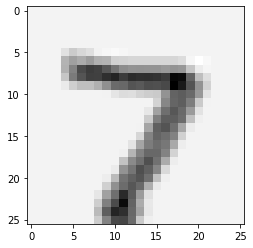

In [13]:
plot_img(conv.forward(test.X[:1]),shape=(26,26))